# scikit-mobility: a Python library for the analysis,generation and risk assessment of mobility data

**Luca Pappalardo**, ISTI-CNR, Italy

**Filippo Simini**, University of Bristol, UK

**Gianni Barlacchi**, FBK, Italy and Amazon, Germany

**Roberto Pellungrini**, University of Pisa, Italy

**Abstract.**
The last decade has witnessed the emergence of massive mobility datasets, such as tracks generated by GPS devices, call detail records, and geo-tagged posts from social media platforms. These datasets have fostered a vast scientific production on various applications of mobility analysis, ranging from computational epidemiology to urban planning and transportation engineering. A strand of literature addresses data cleaning issues related to raw spatiotemporal trajectories, while the second line of research focuses on discovering the statistical "laws" that govern human movements. A significant effort has also been put on designing algorithms to generate synthetic trajectories able to reproduce, realistically, the laws of human mobility. Last but not least, a line of research addresses the crucial problem of privacy, proposing techniques to perform the re-identification of individuals in a database. A view on state of the art cannot avoid noticing that there is no statistical software that can support scientists and practitioners with all the aspects mentioned above of mobility data analysis. In this paper, we propose scikit-mobility, a Python library that has the ambition of providing an environment to reproduce existing research, analyze mobility data, and simulate human mobility habits. scikit-mobility is efficient and easy to use as it extends pandas, a popular Python library for data analysis. Moreover, scikit-mobility provides the user with many functionalities, from visualizing trajectories to generating synthetic data, from analyzing statistical patterns to assessing the privacy risk related to the analysis of mobility datasets.

## Introduction

The last decade has witnessed the emergence of massive data sets of digital traces that portray human movements at an unprecedented scale and detail. Examples include tracks generated by GPS devices embedded in personal smartphones ([Zheng et al. 2008](#ZWZXM2008)), private vehicles ([Pappalardo et al. 2013](#PRQPG2013)) or boats ([Fernandez Arguedas et al. 2018](#FPV2018)); call detail records produced as a by-product of the communication between cellular phones and the mobile phone network ([González et al.](#GHB2008); [Barlacchi et al. 2015](#BDLCCTAVPL2015)); geotagged posts from the most disparate social media platforms ([Noulas et al. 2012](#NSLPM2012)); and even traces describing the activity on the sports fields of amateurs or professional athletes ([Rossi et. 2018](#RPCIFM2018)). The availability of big mobility data has attracted enormous interests from scientists of diverse disciplines, fueling advances in several applications, from computational health ([Tizzoni et al. 2012](#TBPRBGPCV2012); [Barlacchi et al. 2017](#BPMML2017)) to the estimation of air pollution ([Nyhan et al. 2018](#NKBRK2018)), from the design of recommender systems ([Wang et al. 2011](#WPSGB2011)) to the optimization of mobile and wireless networks ([Karamshuk et al. 2011](#KBCP2011)), from transportation engineering and urban planning ([Zhao et al. 2016](#ZTLV2016)) to the estimation of migratory flows ([Simini et al. 2012](#SGMB2012); [Ahmed et al. 2016](#ABBCFLNNPT2016)), from the well-being status of municipalities, regions and countries ([Pappalardo et al. 2016](#PVGSPG2016)) to the prediction of traffic and future displacements ([Zhang et al. 2017](#ZZQ2017); [Rossi et al. 2019](#RBBL2019)).

It is hence not surprising that the last decade has also witnessed a vast scientific production on various aspects of human mobility ([Blondel et al. 2015](#BDK2015); [Barbosa et al. 2018](#BBGJLLMRST2018)). The first strand of literature addresses data cleaning issues related to mobility data, such as how to extract meaningful locations from raw spatiotemporal trajectories, how to filter, reconstruct, compress and segment them, or how to cluster and classify them ([Zheng2015](#Z2015)). As a result, in the literature, there is a vast repertoire of techniques that allow scientists and professionals to improve the quality of their mobility data. 

The second line of research focuses instead on discovering the statistical laws that govern human mobility. These studies document that, far from being random, human mobility is characterized by predictable patterns, such as a stunning heterogeneity of human travel patterns ([González et al.2008](#GHB2008)); a strong tendency to routine and a high degree of predictability of individuals' future whereabouts ([Song et al. 2010b](#SQBB2010)); the presence ofthe so-called returners/explorers dichotomy ([Pappalardo et al. 2015](#PSRPGB2015)); the evidence of a conservative quantity in the number of locations actively visited by individuals ([Alessandretti et al. 2018](#ASSLB2018)), and more. All these quantifiable patterns are universal across different territories and data sources and are usually referred to as the "laws" of human mobility. 

The third strand of literature focuses on designing generative algorithms, i.e., mathematical models that can generate synthetic trajectories able to reproduce, realistically, the laws of
human mobility. In the literature, a class of algorithms aims to realistically reproduce spatial properties of mobility ([Song et al. 2010a](#SKWB2010); [Pappalardo et al.2016a](#PRS2016)), while another class of algorithms focuses on the accurate representation ofthe time-varying behavior of individuals ([Barbosa et al. 2015](#BBEM2015); [Alessandretti et al. 2018](#ASSLB2018)). More recently, some approaches rely on machine learning to propose generative algorithms that are realistic with respect to both spatial and temporal properties of human mobility ([Pappalardo and Simini 2018](#PS2018); [Jiang et al. 2016](#JYGVAG2016)). Although the generation of realistic trajectories is a complex and still open problem, the existing algorithms act as baselines for the evaluation of new approaches. 

Finally, a line of research addresses the crucial problem of privacy: people's movements might reveal confidential personal information or allow the re-identification of individualsin a database, creating serious privacy risks ([De Montjoye et al. 2013](#DHVB2013)). Since 2018, the EU General Data Protection Regulation (GDPR) explicitly imposes on data controllers an assessment of the impact of data protection for the riskiest data analyses. Driven by these sensitive issues, in recent years researchers have developed algorithms, methodologies, and frameworks to estimate and mitigate the individual privacy risks associated with the analysis of big data in general ([Monreale et al. 2014](#MRPGP2014)) and mobility data in particular ([Pellungrini et al. 2017](#PPPM2015)). 

Despite the increasing importance of human mobility analysis for many scientific and industrial domains, a view on the state of the art cannot avoid noticing that there is no statistical software that can support scientists and practitioners with all the aspects of mobility analysis mentioned above. To fill this gap, we propose *scikit-mobility*, a python library that has the ambition of providing scientists and practitioners with an environment to reproduce existing research and perform analysis of human mobility data. In particular, the library allows the user to:

1. load and represent mobility data, both at the individual and the collective level, through easy-to-use data structures – namely `TrajDataFrame` and `FlowDataFrame` – based on the standard python libraries *numpy* ([Oliphant 2006](#O2006)), *pandas* ([McKinney 2010](#M2010)) and *geopandas* ([Jordahl 2019](#J2019)) (Section 2), as well as to visualize trajectories and fluxes on interactive maps based on the python libraries *folium* ([Fernandes 2019](#F2019)) and *matplotlib* ([Hunter 2007](#H2007)) (Section 4);

2. clean and preprocess mobility data using state-of-the-art techniques, such as trajectory clustering, compression, segmentation, and filtering. The library also provides the user with a way to track all the operations performed on the original data (Section 3);

3. analyze mobility data by using the main measures characterizing human mobility patterns both at the individual and at the collective level (Section 5), such as the computation of travel and characteristic distances, user and location entropies, location frequencies, waiting times, origin-destination matrices, and more;

4. run the most popular generative algorithms to simulate individual human mobility, such as Random Walks, the EPR model and its variants (Section 6), and commuting and migratory flows, such as the Gravity Model and the Radiation Model (Section 7);

5. estimate the privacy risk associated with the analysis of a given mobility data set through the simulation of the re-identification risk associated with a vast repertoire of privacy attacks (Section 8). 

*scikit-mobility* is publicly available on GitHub at the following link: https://scikit-mobility.github.io/scikit-mobility/. The documentation describing all the classes and functions of scikit-mobility is available at https://scikit-mobility.github.io/scikit-mobility/.

## 2. Data Structures

scikit-mobility provides two data structures to deal with raw trajectories and flows betweenplaces. Both the data structures are an extension of the `DataFrame` implemented in the data analysis library *pandas* [(McKinney 2010)](#M2010). Thus, both `TrajDataFrame` and `FlowDataFrame` inherit all the functionalities provided by the `DataFrame` as well as all the efficient optimizations for reading and writing tabular data (e.g., human mobility datasets).

### 2.1. Trajectory

Mobility data describe the movements of a set of objects during a period of observation. The objects may represent individuals (Gonzálezet al.2008), animals (Ramos-Fernández,Mateos, Miramontes, Cocho, Larralde, and Ayala-Orozco 2004), private vehicles (Pappalardoet al.2015), boats (Fernandez Arguedaset al.2018) and even players on a sports field (Rossiet al.2018). Mobility data are generally collected in an automatic way as a by-product of human activity on electronic devices (e.g., mobile phones, GPS devices, social networkingplatforms, video cameras) and stored as *trajectories*, a temporally ordered sequence of spatio-temporal points where an object stopped in or went through. In the literature of human mobility analytics, a trajectory is often formally defined as follows (Zheng, Capra, Wolfson,and Yang 2014; Zheng 2015):

**Definition 2.1 (Trajectory).** The trajectory of an object $u$ is a temporally ordered sequence of tuples $T_u=\langle(l_1, t_1),(l_2, t_2), \dots ,(l_n, t_n)\rangle$, where $l_i= (x_i, y_i)$ is a location, $x_i$ and $y_i$ are the coordinates of the location, and $t_i$ is the corresponding timestamp, with $t_i < t_j$ if $i < j$.

In scikit-mobility, a set of trajectories is described by a `TrajDataFrame` (Figure 1), an ex-tension of the *pandas* `DataFrame` that has specific columns names and data types. A row in the `TrajDataFrame` represents a point of the trajectory, described by three mandatory fields (aka columns): `latitude` (type: float), `longitude` (type: float) and `datetime` (type: date-time). Additionally, two optional columns can be specified. The first one is `uid` (type: string) and identifies the object associated with the point of the trajectory. If `uid` is not present, scikit-mobility assumes that the `TrajDataFrame` contains trajectories associated with a single moving object. The second one is `tid` and specifies the identifier of the trajectory to which the point belongs to. If `tid` is not present, scikit-mobility assumes that all the rows in the `TrajDataFrame` that are associated with a `uid` belong to the same trajectory. Note that, besides the mandatory columns, the user can add to a `TrajDataFrame` as many columns as they want since the data structures in scikit-mobility inherit all the *pandas* `DataFrame` functionalities.

Each `TrajDataFrame` also has two mandatory attributes:
- `crs` (type: dictionary): indicates the coordinate reference system associated with the trajectories. By default it is `epsg:4326` (the latitude/longitude reference system);
- `parameters`(type: dictionary): indicates the operations that have been applied to theTrajDataFrame. This attribute is a dictionary the key of which is the signature of the function applied (see Section 3 for more details). scikit-mobility provides functions to create a `TrajDataFrame` from mobility data stored indifferent formats (e.g., dictionaries, lists, *pandas* `DataFrame`s). To load a `TrajDataFrame` from a file, we first import the library.

In [1]:
import skmob
skmob.core.trajectorydataframe.np.random.seed(0)

Then, we use the method `from_file` of the `TrajDataFrame` class to load the mobility data from the file path.

In [2]:
tdf = skmob.TrajDataFrame.from_file('geolife_sample.txt.gz')

The `crs` attribute of the loaded `TrajDataFrame` provides the coordinate reference system, while the `parameters` attribute provides a dictionary with meta-information about the data. When we load the data from a file, scikit-mobility adds to the `parameters` attribute the key `"from_file"`, which indicates the path of the file.

In [3]:
print(tdf.crs)

{'init': 'epsg:4326'}


In [4]:
print(tdf.parameters)

{'from_file': 'geolife_sample.txt.gz'}


Once loaded, we can visualize a portion of the `TrajDataFrame` using the `print` function and the `head` function, which visualize the first five rows of the `TrajDataFrame`. Note that, since the `uid` column is present in the file, the `TrajDataFrame` created contains the corresponding column.

In [5]:
print(tdf.head())

         lat         lng            datetime  uid
0  39.984094  116.319236 2008-10-23 05:53:05    1
1  39.984198  116.319322 2008-10-23 05:53:06    1
2  39.984224  116.319402 2008-10-23 05:53:11    1
3  39.984211  116.319389 2008-10-23 05:53:16    1
4  39.984217  116.319422 2008-10-23 05:53:21    1


### 2.2. Flows

Origin-destination matrices, aka flows, are another common representation of mobility data. While trajectories refer to movements of single objects, flows refer to aggregated movements of objects between a set of locations. An example of flows is the daily commuting flows between the neighborhoods of a city. Formally, we define an origin-destination matrix as:

**Definition 2.2 (Origin-Destination matrix or Flows).** An Origin-Destination matrix $T$ is a $n\times m$ matrix where $n$ is the number of distinct "origin" locations, $m$ is the number of distinct "destination" locations, $T_{ij}$ is the number of objects traveling from location $i$ to location $j$. In scikit-mobility, an origin-destination matrix is described by the `FlowDataFrame` structure. A `FlowDataFrame` is an extension of the *pandas* `DataFrame` that has specific column names and data types. A row in a `FlowDataFrame` represents a flow of objects between two locations, described by three mandatory columns:origin(type: string),destination(type: string)andflow(type: integer). Again, the user can add to aFlowDataFrameas many columnsas they want.  EachFlowDataFrameis associated with a spatial tessellation, ageopandasGeoDataFrame that contains two mandatory columns: `tile_ID` (type: integer) indicates the identifier of a location; `geometry` indicates the polygon (or point) that describes the geometric shape of the location on a territory (e.g., a square, a voronoi shape, the shape of a neighborhood). It is important to note that each location identifier in the `origin` and `destination` columns of a `FlowDataFrame` must be present in the associated spatial tessellation. The code below loads a spatial tessellation and a `FlowDataFrame` from the corresponding files. First, we import the scikit-mobility and the *geopandas* libraries.

In [6]:
import skmob
import geopandas as gpd

Then, we load the spatial tessellation and the `FlowDataFrame` using the `from_file` method of the classes `GeoDataFrame` and `TrajDataFrame`, respectively. Note that `from_file` requires to specify the associated spatial tessellation through the "tessellation" argument.

In [7]:
tessellation = gpd.GeoDataFrame.from_file("NY_counties_2011.geojson")
fdf = skmob.FlowDataFrame.from_file("NY_commuting_flows_2011.csv", 
                                    tessellation=tessellation, tile_id='tile_id')

The spatial tessellation and `FlowDataFrame` have the structure shown below.

In [8]:
print(tessellation.head())

  tile_id  population                                           geometry
0   36019       81716  POLYGON ((-74.00667 44.88602, -74.02739 44.995...
1   36101       99145  POLYGON ((-77.09975 42.27421, -77.09966 42.272...
2   36107       50872  POLYGON ((-76.25015 42.29668, -76.24914 42.302...
3   36059     1346176  POLYGON ((-73.70766 40.72783, -73.70027 40.739...
4   36011       79693  POLYGON ((-76.27907 42.78587, -76.27535 42.780...


In [9]:
print(fdf.head())

     flow origin destination
0  121606  36001       36001
1       5  36001       36005
2      29  36001       36007
3      11  36001       36017
4      30  36001       36019


## 3. Trajectory preprocessing

As any analytical process, mobility data analysis requires data cleaning and preprocessing steps [(Zheng 2015)](#Z2015). The `preprocessing` module allows the user to perform three main preprocessing steps: noise filtering, stop detection, and trajectory compression. Note that, if a `TrajDataFrame` contains multiple trajectories from multiple users, the preprocessing methods automatically apply to the single trajectory and, when necessary, to the single object.

### 3.1. Noise filtering

Trajectory data are in general noisy, usually because of recording errors like poor signal reception. When the error associated with the coordinates of points is large, the best solution is to filter out these points. In scikit-mobility, the method `filter` filters out a point if the speed from the previous point is higher than the parameter `max_speed`, which is by default set to 500km/h. To use the `filter` function, we first import the `preprocessing` module:

In [10]:
import skmob
from skmob import preprocessing

Then, we apply the filtering, setting max speed as 10 km/h, on a `TrajDataFrame` containing GPS trajectories:

In [11]:
tdf = skmob.TrajDataFrame.from_file('geolife_sample.txt.gz')
print("Number of points in tdf: %d\n" %len(tdf))
print(tdf.head())

Number of points in tdf: 217653

         lat         lng            datetime  uid
0  39.984094  116.319236 2008-10-23 05:53:05    1
1  39.984198  116.319322 2008-10-23 05:53:06    1
2  39.984224  116.319402 2008-10-23 05:53:11    1
3  39.984211  116.319389 2008-10-23 05:53:16    1
4  39.984217  116.319422 2008-10-23 05:53:21    1


In [12]:
ftdf = preprocessing.filtering.filter(tdf, max_speed_kmh=10.)
print("Number of points in ftdf: %d" %len(ftdf))
print("Number of filtered points: %d\n" %(len(tdf) - len(ftdf)))
print(ftdf.head())

Number of points in ftdf: 108779
Number of filtered points: 108874

         lat         lng            datetime  uid
0  39.984094  116.319236 2008-10-23 05:53:05    1
1  39.984211  116.319389 2008-10-23 05:53:16    1
2  39.984217  116.319422 2008-10-23 05:53:21    1
3  39.984555  116.319728 2008-10-23 05:53:43    1
4  39.984579  116.319769 2008-10-23 05:53:48    1


As we can see, 108,874 points out of 217,653 are filtered out. The intensity of the filter is controlled by the ``max_speed'' parameter. The lower the value, the more intense is the filter.


### 3.2. Stop detection

Some points in a trajectory can represent Point-Of-Interests (POIs) such as schools, restau-rants, and bars, or they can represent user-specific places such as home and work locations. These points are usually called Stay Points or Stops, and they can be detected in different ways.  A common approach is to apply spatial clustering algorithms to cluster trajectory points by looking at their spatial proximity [(Hariharan and Toyama 2004)](#HT2004). In scikit-mobility, the `stops` function, contained in the `detection` module, finds the stay points visited by an object. For instance, to identify the stops where the object spent at least `minutes_for_a_stop` minutes within a distance `spatial_radius_km \times stop_radius_factor`, from a given point, we can use the following code:

In [13]:
from skmob.preprocessing import detection
stdf = detection.stops(tdf, stop_radius_factor=0.5, 
                       minutes_for_a_stop=20.0, spatial_radius_km=0.2, leaving_time=True)
print(stdf.head())

         lat         lng            datetime  uid    leaving_datetime
0  39.978253  116.327275 2008-10-23 06:01:05    1 2008-10-23 10:32:53
1  40.013819  116.306532 2008-10-23 11:10:09    1 2008-10-23 23:46:02
2  39.978950  116.326439 2008-10-24 00:12:30    1 2008-10-24 01:48:57
3  39.981316  116.310181 2008-10-24 01:56:47    1 2008-10-24 02:28:19
4  39.981451  116.309505 2008-10-24 02:28:19    1 2008-10-24 03:18:23


As showed in the code snippet, a new column `leaving_datetime` is added to the `TrajDataFrame` in order to indicate the time when the moving object left the stop location.

### 3.3. Trajectory compression

The goal of trajectory compression is to reduce the number of trajectory points while preserving the structure of the trajectory. This step is generally applied right after the stop detection step, and it results in a significant reduction of the number of trajectory points. In scikit-mobility, we can use one of the methods in the `compression` module under the `preprocessing` module. For instance, to merge all the points that are closer than 0.2km from each other, wecan use the following code:

In [14]:
from skmob.preprocessing import compression
print(ftdf.head())

         lat         lng            datetime  uid
0  39.984094  116.319236 2008-10-23 05:53:05    1
1  39.984211  116.319389 2008-10-23 05:53:16    1
2  39.984217  116.319422 2008-10-23 05:53:21    1
3  39.984555  116.319728 2008-10-23 05:53:43    1
4  39.984579  116.319769 2008-10-23 05:53:48    1


In [15]:
ctdf = compression.compress(ftdf, spatial_radius_km=0.2)
print(ctdf.head())

         lat         lng            datetime  uid
0  39.984334  116.320778 2008-10-23 05:53:05    1
1  39.979642  116.322241 2008-10-23 05:58:33    1
2  39.978051  116.327538 2008-10-23 06:01:47    1
3  39.970511  116.341455 2008-10-23 10:32:53    1
4  40.016006  116.306444 2008-10-23 11:08:07    1


Once compressed, the trajectory will present a smaller number of points, allowing then an easy plotting of them by using the data visualization functionalities of scikit-mobility described in Section 4.

## 4. Plotting

One of the use cases for scikit-mobility is the exploratory data analysis of mobility data sets, which includes the visualization of trajectories and flows. To this end, both `TrajDataFrame` and `FlowDataFrame` have methods that allow the user to produce interactive visualizations generated using the python library *folium* [(Fernandes 2019)](#F2019).

### 4.1. Visualizing Trajectories

A `TrajDataFrame` has three main plotting methods: `plot_trajectory` plots a line connecting the trajectory points on a map; `plot_stops` plots the location of stops on a map; and `plot_diary` plots the sequence of visited locations over time.

#### Plot trajectories

The `TrajDataFrame`'s method `plot_trajectory` plots the time-ordered trajectory points connected by straight lines on a map. If the column `uid` is present and contains more than one object, the trajectory points are first grouped by `uid` and then sorted by `datetime`. Large `TrajDataFrame`s with many points can be computationally intensive to visualize. Two arguments can be used to reduce the amount of data to plot: `max_users` (type:int, default:10) limits the number of objects whose trajectories should be plotted, while `max_points` (type:int, default: 1000) limits the number of trajectory points per object to plot, i.e., if necessary, an object's trajectory will be down-sampled and at most `max_points` points will be plotted. The plot style can be customized via arguments to specify the color, weight, and opacity of the trajectory lines, as well as the type of map tiles to use. The user can also plot markers denoting the start points and the end points of the trajectory. 

The method returns a `folium.Map` object, which can be used by other *folium* and *scikit-mobility* functions in order to visualize additional data on the same map. 
A `folium.Map` object can be passed to `plot_trajectory` via the argument `map_f` (default:None, which means that the trajectory is plotted on a new map).

An example of plot generated by the `plot_trajectory` method is shown below:

In [16]:
import skmob
tdf = skmob.TrajDataFrame.from_file('geolife_sample.txt.gz')
map_f = tdf.plot_trajectory(max_users=1, hex_color='#000000', start_end_markers=False)
map_f

#### Plot stops

The `TrajDataFrame`'s method `plot_stops` plots the locations of the stops as markers on a map. This method requires a `TrajDataFrame` with the column `constants.LEAVING_DATETIME`, which is created by the *scikit-mobility* functions to detect stops (see Section 3). The argument `max_users` (type:int, default: 10) limits the number of objects whose stops should be plotted. The plot style can be customized via arguments to specify the color, radius, and opacity of the markers, as well as the type of the map tiles to use. The argument `popup` (default:False) allows enhancing the plot's interactivity displaying popup windows that appear when the user clicks on a marker. A stop's popup window includes information like coordinates, object's uid, arrival, and leaving times. 

The method returns a `folium.Map` object, which can be used by other *folium* and *scikit-mobility* functions in order to visualize additional data on the same map. A `folium.Map` object can be passed to `plot_stops` via the argument `map_f` (default:None, which means that the stops are plotted on a new map). 

We show below an example of a plot generated by the `plot_stops` method. Note that if the `cluster` column is present in the TrajDataFrame, as it happens for instance when the `cluster` method is applied, the stops are automatically colored according to the value of that column (so as to identify different clusters of stops).

In [17]:
from skmob.preprocessing import detection, clustering
tdf = skmob.TrajDataFrame.from_file('geolife_sample.txt.gz')
stdf = detection.stops(tdf)
cstdf = clustering.cluster(stdf)
cstdf.plot_stops(max_users=1, map_f=map_f)

#### Plot diary

The `TrajDataFrame`'s method `plot_diary` plots the time series of the locations visited by an object. If the column `uid` is present, one object identifier must be specified via the argument `user`. This method requires a `TrajDataFrame` with the column `constants.CLUSTER`, which is created by the *scikit-mobility* functions to cluster stops.

The plot displays time on the *x* axis and shows a series of rectangles of different colors that represent the object's visits to the various stops. The length of a rectangle denotes the duration of the visit: the left edge marks the arrival time, the right edge marks the leaving time. The color of a rectangle denotes the stop's cluster: visits to stops that belong to the same cluster have the same color (the color code is consistent with the one used by the method `plot_stops`). A white rectangle indicates that the object is moving. We show below an example of a plot generated by the `plot_diary` method:

<AxesSubplot:title={'center':'user 1'}>

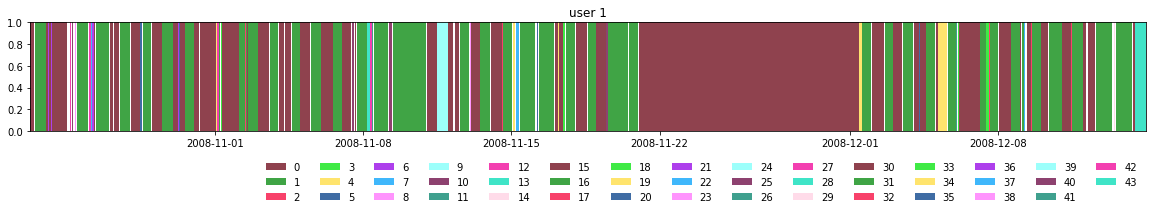

In [18]:
cstdf.plot_diary(1, legend=True)

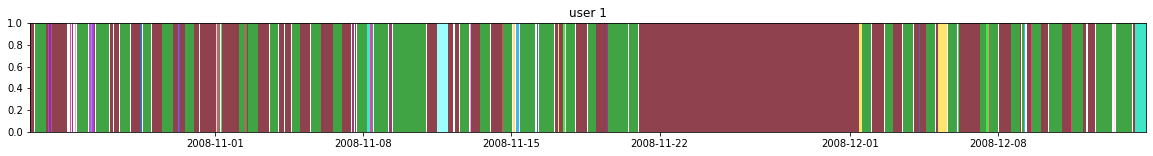

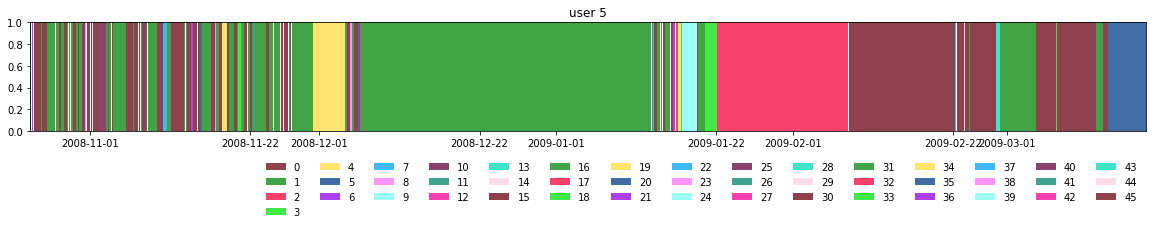

In [19]:
ax = cstdf.plot_diary(1)
ax = cstdf.plot_diary(5, legend=True)

### 4.2. Visualizing flows

A `FlowDataFrame` has two main plotting methods: `plot_tessellation` plots the tessellation's tiles on a geographic map and `plot_flows` plots, on a geographic map, the lines connecting the centroids of the tessellation's tiles between which flows are present.

### Plot tessellation

The `FlowDataFrame`'s method `plot_tessellation` plots the `GeoDataFrame` associated with a `FlowDataFrame` on a geographic map. Large tessellations with many tiles can be computationally intensive to visualize. The argument `maxitems` can be used to limit the number of tiles to plot (default: -1, which means that all tiles are displayed).

The plot style can be customized via arguments to specify the color and opacity of the tiles, as well as the type of map tiles to use. The argument `popup_features` (type:list, default:`[constants.TILE_ID]`) allows to enhance the plot's interactivity displaying popup windows that appear when the user clicks on a tile and includes information contained in the columns of the tessellation's `GeoDataFrame` specified in the argument's list. 

The method returns a `folium.Map` object, which can be used by other *folium* and *scikit-mobility* functions in order to visualize additional data on the same map. A `folium.Map` object can be passed to `plot_flows` via the argument `map_f` (default:None, which means that the tessellation is plotted on a new map). 

We show below an example of a plot generated by the `plot_tessellation` method:

In [20]:
import geopandas as gpd
from skmob import FlowDataFrame
tessellation = gpd.GeoDataFrame.from_file('NY_counties_2011.geojson')
fdf = FlowDataFrame.from_file('NY_commuting_flows_2011.csv', 
                              tessellation=tessellation, tile_id='tile_id')
fdf.plot_tessellation(popup_features=['tile_id','population'], style_func_args={'color': 'red'})

### Plot flows

The `FlowDataFrame`'s method `plot_flows` plots the flows on a geographic map as lines between the centroids of the tiles in the `FlowDataFrame`'s tessellation. Large `FlowDataFrame`s with many origin-destination pairs can be computationally intensive to visualize. The argument `min_flow` (type: integer, default: 0) can be used to specify that only flows larger than `min_flow` should be displayed. The thickness of each line is a function of the flow and can be specified via the arguments `flow_weight`, `flow_exp` and `style_function`. The plot style can be further customized via arguments to specify the color and opacity of the flow lines, as well as the type of map tiles to use. The arguments `flow_popup` and `tile_popup` allow to enhance the plot's interactivity displaying popup windows that appear when the user clicks on a flow line or a circle in an origin location, respectively, and include information on the flow or the flows from a location. The method returns a `folium.Map` object, which can be used by other *folium* and *scikit-mobility* functions in order to visualize additional data on the same map. A `folium.Map` object can be passed to `plot_flows` via the argument `map_f` (default:None, which means that the flows are plotted on a new map).

We show below an example of a plot generated by theplot_flowsmethod:

In [21]:
fdf.plot_flows(min_flow=50)

In [22]:
map_f = fdf.plot_tessellation(popup_features=['tile_id','population'], style_func_args={'color': 'red'})
fdf.plot_flows(map_f=map_f, min_flow=50)

## 5. Mobility measures

In the last decade, several measures have been proposed to capture the patterns of human mobility, both at the individual and collective levels. Individual measures summarize the mobility patterns of a single moving object, while collective measures summarize mobility patterns of a population as a whole. For instance, the so-called radius of gyration [(González et al.2008)](#GHB2008) and its variants [(Pappalardo et al.2015)](#PSRPGB2015) quantify the characteristic distance traveled by an individual, while several measures inspired by the Shannon entropy have been proposed to quantify the predictability of an individual's movements [(Song et al.2010b)](#SQBB2010). 

*scikit-mobility* provides a wide set of mobility measures, each implemented as a function that takes in input a `TrajDataFrame` and outputs a *pandas* `DataFrame`. Individual and collective measures are implemented the in `skmob.measure.individual` and the `skmob.measures.collective` modules, respectively. 

The code below computes two measures: the distances traveled by the objects and their radius of gyration. First, we import the two functions from the library.

In [23]:
import skmob
from skmob.measures.individual import jump_lengths, radius_of_gyration

/opt/anaconda3/envs/skmob/lib/python3.7/site-packages/tqdm/std.py:703: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


We then load a `TrajDataFrame` from the web, describing all checkins made through the social network platform Brightkite:

In [24]:
url = "https://snap.stanford.edu/data/loc-brightkite_totalCheckins.txt.gz"
import pandas as pd
df = pd.read_csv(url, sep='\t', header=0, nrows=100000, 
                 names=['user', 'check-in_time', 
                        "latitude", "longitude", 
                        "location id"])
tdf = skmob.TrajDataFrame(df, latitude='latitude', 
                          longitude='longitude', 
                          datetime='check-in_time',
                          user_id='user').sort_values(by='datetime')
print(tdf.head())

       uid                  datetime        lat         lng  \
15410   12 2008-03-22 05:01:29+00:00  39.768753 -105.006395   
15409   12 2008-03-22 05:50:55+00:00  39.768057 -105.002983   
15408   12 2008-03-22 06:17:35+00:00  39.768057 -105.002983   
15407   12 2008-03-22 06:34:37+00:00  39.768057 -105.002983   
15406   12 2008-03-22 19:45:30+00:00  39.785486 -104.895457   

                                    location id  
15410  7b52009b64fd0a2a49e6d8a939753077792b0554  
15409  fa35e192121eabf3dabf9f5ea6abdbcbc107ac3b  
15408  fa35e192121eabf3dabf9f5ea6abdbcbc107ac3b  
15407  fa35e192121eabf3dabf9f5ea6abdbcbc107ac3b  
15406  f1abd670358e036c31296e66b3b66c382ac00812  


Then, we invoke the two functions on theTrajDataFrame, respectively.

In [25]:
jl_df = jump_lengths(tdf)
rg_df = radius_of_gyration(tdf)

100%|██████████| 162/162 [00:00<00:00, 273.50it/s]


The output of the functions is a *pandas* `DataFrame` with two columns: `uid` contains the identifier of the object; the second column, the name of which corresponds to the name of the invoked function, contains the computed measure for that object. For example, in the `DataFrame` `jl_df`, the column `jump_length` of the `DataFrame` contains a list of all distances traveled by that object.

In [26]:
print(jl_df.head())

   uid                                       jump_lengths
0    0  [19.640467328877936, 0.0, 0.0, 1.7434311010381...
1    1  [6.505330424378251, 46.75436600375988, 53.9284...
2    2  [0.0, 0.0, 0.0, 0.0, 3.6410097195943507, 0.0, ...
3    3  [3861.2706300798827, 4.061631313492122, 5.9163...
4    4  [15511.92758595804, 0.0, 15511.92758595804, 1....


Similary, in the `DataFrame` `rg_df` the column `radius_of_gyration` contains the radius of gyration for that object.

In [27]:
print(rg_df.head())

   uid  radius_of_gyration
0    0         1564.436792
1    1         2467.773523
2    2         1439.649774
3    3         1752.604191
4    4         5380.503250


Note that, if the optional column `uid` is not present in the input `TrajDataFrame`, a simple Python structure is outputted instead of the *pandas* `DataFrame` (e.g., a list for function `jump_lengths` and a float for function `radius_of_gyration`).

Collective measures are used in a similar way. The code below computes a collective measure - the number of visits per location (by any object). First, we import the function.

In [28]:
from skmob.measures.collective import visits_per_location

/opt/anaconda3/envs/skmob/lib/python3.7/site-packages/tqdm/std.py:703: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


Then, we invoke the function on the `TrajDataFrame`.

In [29]:
vpl_df = visits_per_location(tdf)

As for the individual measures, the output of the functions is a *pandas* `DataFrame`.  The format of this `DataFrame` depends on the measures. For example, in the `DataFrame` `vpl_df` there are three columns: `lat` and `lng` indicate the coordinates of a location, and `n_visits` indicate the number of visits to that location in the `TrajDataFrame`.

In [30]:
print(vpl_df.head())

         lat         lng  n_visits
0  39.739154 -104.984703      3392
1  37.580304 -122.343679      2248
2  39.099275  -76.848306      1715
3  39.762146 -104.982480      1442
4  40.014986 -105.270546      1310


## 6. Individual Generative Algorithms

The goal of generative algorithms of human mobility is to create a population of agents whose mobility patterns are statistically indistinguishable from those of real individuals [(Pappalardo and Simini 2018)](#PS2018). A generative algorithm typically generates a synthetic trajectory corresponding to a single moving object, assuming that an object is independent of the others. *scikit-mobility* implements the most common individual generative algorithms, such as the Exploration and Preferential Return model [(Song et al.2010a)](#SKWB2010) and its variants ([Pappalardo et al.2016a](#PRS2016); [Barbosa et al.2015](#BLEM2015); [Alessandretti et al. 2018](#ASSLB2018)), and DITRAS [(Pappalardo and Simini 2018)](#PS2018). Each generative algorithm is a python class. First, we instantiate the algorithm. Then we invoke the `generate` method to start the generation of synthetic trajectories.

The code below shows the code to generate a `TrajDataFrame` describing the synthetic trajectory of 1000 agents that move between the locations of a spatial tessellation and for a period specified in the input. First, we import the class of the generative algorithm (`DensityEPR`) from the library.

In [31]:
import skmob
import pandas as pd
import geopandas as gpd
from skmob.models.epr import DensityEPR

Then, we load the spatial tessellation on which the agents have to move from a file, and we specify the start and end times of the simulation as *pandas* datetime objects.

In [32]:
tessellation = gpd.GeoDataFrame.from_file("NY_counties_2011.geojson")
start_time = pd.to_datetime('2019/01/01 08:00:00')
end_time = pd.to_datetime('2019/01/14 08:00:00')

Finally, we instantiate the `DensityEPR` model and start the simulation through the `generate` method, which takes in input the start and end times, the spatial tessellation, the number of agents, and other model-specific parameters. The output of the simulation is a `TrajDataFrame` containing the trajectory of the 1000 agents.

In [33]:
depr = DensityEPR()
tdf = depr.generate(start_time, end_time, tessellation, n_agents=1000, 
                    relevance_column='population', show_progress=True, random_state=42)
print(tdf.head())

  0%|          | 0/1000 [00:00<?, ?it/s]/opt/anaconda3/envs/skmob/lib/python3.7/site-packages/skmob/models/gravity.py:43: RuntimeWarning: divide by zero encountered in power
  return np.power(x, exponent)
100%|██████████| 1000/1000 [00:47<00:00, 20.97it/s]


   uid                   datetime        lat        lng
0    1 2019-01-01 08:00:00.000000  42.393730 -76.875204
1    1 2019-01-01 08:36:25.019263  42.452018 -76.473618
2    1 2019-01-01 09:10:52.828149  42.393730 -76.875204
3    1 2019-01-02 03:14:59.370208  42.702464 -78.224637
4    1 2019-01-02 03:40:17.509278  44.592993 -74.303615


## 7. Collective Generative Algorithms

Collective generative algorithms estimate spatial flows between a set of discrete locations. Examples of spatial flows estimated with collective generative algorithms include commuting trips between neighborhoods, migration flows between municipalities, freight shipments between states, and phone calls between regions [(Barbosa et al.2018)](#BBGJLLMRST2018).

In *scikit-mobility*, a collective generative algorithm takes in input a spatial tessellation. To be a valid input for a collective algorithm, the spatial tessellation should be a `GeoDataFrame` containing two columns, `geometry` and `relevance`, which are necessary to compute the two variables used by collective algorithms: the distance between tiles and the importance (aka "attractiveness") of each tile. A collective algorithm produces a `FlowDataFrame` that contains the generated flows and the spatial tessellation of which is the one specified as the algorithm's input. 

*scikit-mobility* implements the most common collective generative algorithms: the Gravity model ([Zipf 1946](#Z1946); [Wilson 1971](#W1971)) and the Radiation model ([Simini et al.2012](#SGMB2012)). We illustrate how to work with generative algorithms in *scikit-mobility* with an example based on the Gravity model. The class `Gravity`, implementing the Gravity model, has two main methods: `fit`, which calibrates the model's parameters using a `FlowDataFrame`; and `generate`, which generates the flows on a given tessellation.  The following code shows how to use both methods to estimate the commuting flows between the counties in the state of New York. First, we load the tessellation from a file:

In [34]:
import skmob
import geopandas as gpd
tessellation = gpd.GeoDataFrame.from_file("NY_counties_2011.geojson")
print(tessellation.head())

  tile_id  population                                           geometry
0   36019       81716  POLYGON ((-74.00667 44.88602, -74.02739 44.995...
1   36101       99145  POLYGON ((-77.09975 42.27421, -77.09966 42.272...
2   36107       50872  POLYGON ((-76.25015 42.29668, -76.24914 42.302...
3   36059     1346176  POLYGON ((-73.70766 40.72783, -73.70027 40.739...
4   36011       79693  POLYGON ((-76.27907 42.78587, -76.27535 42.780...


The tessellation contains the column `population`, used as relevance variable for each tile (county). Next, we load the observed commuting flows between the counties from file:

In [35]:
fdf = skmob.FlowDataFrame.from_file("NY_commuting_flows_2011.csv", 
                                    tessellation=tessellation, tile_id='tile_id')
print(fdf.head())

     flow origin destination
0  121606  36001       36001
1       5  36001       36005
2      29  36001       36007
3      11  36001       36017
4      30  36001       36019


Let us use the observed flows to fit the parameters of a singly-constrained gravity model with the power-law deterrence function (for more details on the gravity models see ([Barbosa et al.2018](#BBGJLLMRST2018)). First, we instantiate the model:

In [36]:
from skmob.models.gravity import Gravity
gravity = Gravity(gravity_type='singly constrained')
print(gravity)

Gravity(name="Gravity model", deterrence_func_type="power_law", deterrence_func_args=[-2.0], origin_exp=1.0, destination_exp=1.0, gravity_type="singly constrained")


Then we call the method `fit` to fit the parameters from the previously loaded `FlowDataFrame`:

In [37]:
gravity.fit(fdf, relevance_column='population')
print(gravity)

Gravity(name="Gravity model", deterrence_func_type="power_law", deterrence_func_args=[-1.9947152031913087], origin_exp=1.0, destination_exp=0.6471759552223173, gravity_type="singly constrained")


Finally, we use the fitted model to generate the flows on the same tessellation. Setting the argument `out_format="probabilities"` we specify that in the column `flow` of the returned `FlowDataFrame` we want the probability to observe a unit flow (trip) between two tiles.

In [38]:
fdf_fitted = gravity.generate(tessellation, relevance_column='population', 
                              out_format='probabilities', tile_id_column='tile_id')
print(fdf_fitted.head())

100%|██████████| 62/62 [00:00<00:00, 8789.52it/s]

  origin destination      flow
0  36019       36101  0.004387
1  36019       36107  0.003702
2  36019       36059  0.019679
3  36019       36011  0.006894
4  36019       36123  0.002292



/opt/anaconda3/envs/skmob/lib/python3.7/site-packages/skmob/models/gravity.py:43: RuntimeWarning: divide by zero encountered in power
  return np.power(x, exponent)


## 8. Privacy Risk Assessment

Mobility data is sensitive since the movements of individuals can reveal confidential personal information or allow the re-identification of individuals in a database, creating serious privacy risks ([De Montjoye et al.2013](#DHVB2013)). Indeed the General Data Protection Regulation (GDPR) explicitly imposes on data controllers an assessment of the impact of data protection forthe riskiest data analyses. For this reason, *scikit-mobility* provides scientists in the field of mobility analysis with tools to estimate the privacy risk associated with the analysis of agiven data set.

In the literature, privacy risk assessment relies on the concept of re-identification of a moving object in a database through an attack by a malicious adversary ([Pellungrini et al.2017](#PPPM2017)). A common framework for privacy risk assessment ([Pratesi et al. 2018](#PMTGPY2018)) assumes that during the attack a malicious adversary acquires, in some way, the access to an anonymized mobility data set, i.e., a mobility data set in which the moving object associated with a trajectory is not known. Moreover, it is assumed that the malicious adversary acquires, in some way, information about the trajectory (or a portion of it) of an individual represented in the acquired data set. Based on this information, the risk of re-identification of that individual is computed estimating how unique that individual's mobility data are with respect to the mobility data of the other individuals represented inthe acquired data set ([Pellungrini et al.2017](#PPPM2017)). 

*scikit-mobility* provides several attack models, each implemented as a python class. For example in a location attack model, implemented in the `LocationAttack` class, the malicious adversary knows a certain number of locations visited by an individual, but they do not know the temporal order of the visits ([Pellungrini et al.2017](#PPPM2017)). To instantiate a `LocationAttack` object we can run the following code:

In [39]:
import skmob
from skmob.privacy import attacks
at = attacks.LocationAttack(knowledge_length=2)

The argument `knowledge_length` specifies how many locations the malicious adversary knows of each object's movement. The re-identification risk is computed based on the worst possible combination of `knowledge_length` locations out of all possible combinations of locations.

To assess the re-identification risk associated with a mobility data set, represented as a `TrajDataFrame`, we specify it as input to the `assess_risk` method, which returns a *pandas* `DataFrame` that contains the `uid` of each object in the `TrajDataFrame` and the associated re-identification risk as the column `risk` (type: float, range:$[0,1]$ where 0 indicates minimum risk and 1 maximum risk).

In [40]:
tdf = skmob.TrajDataFrame.from_file(filename="privacy_toy.csv")
tdf_risk = at.assess_risk(tdf)
print(tdf_risk.head())

   uid      risk
0    1  0.333333
1    2  0.500000
2    3  0.333333
3    4  0.333333
4    5  0.250000


Since risk assessment may be time-consuming for more massive datasets, *scikit-mobility* provides the option to focus only on a subset of the objects with the argument `targets`. For example, in the following code, we compute the re-identification risk for the object with `uid` 1 and 2 only:

In [41]:
tdf_risk = at.assess_risk(tdf, targets=[1,2])
print(tdf_risk)

   uid      risk
0    1  0.333333
1    2  0.500000


During the computation, not necessarily all combinations of locations are evaluated when assessing the re-identification risk of a moving object: when the combination with maximum re-identification risk (e.g., risk 1) is found for a moving object, all the other combinations are not computed, so as to make the computation faster. However, if the user wants that all combinations are computed anyway, they can set the argument `force_instances` (type:boolean, default:False) to `True`:

In [42]:
tdf_risk = at.assess_risk(tdf, targets=[2], force_instances=True)
print(tdf_risk)

          lat        lng            datetime  uid  instance  instance_elem  \
0   43.843014  10.507994 2011-02-03 08:34:04    2         1              1   
1   43.708530  10.403600 2011-02-03 09:34:04    2         1              2   
2   43.843014  10.507994 2011-02-03 08:34:04    2         2              1   
3   43.843014  10.507994 2011-02-04 10:34:04    2         2              2   
4   43.843014  10.507994 2011-02-03 08:34:04    2         3              1   
5   43.544270  10.326150 2011-02-04 11:34:04    2         3              2   
6   43.708530  10.403600 2011-02-03 09:34:04    2         4              1   
7   43.843014  10.507994 2011-02-04 10:34:04    2         4              2   
8   43.708530  10.403600 2011-02-03 09:34:04    2         5              1   
9   43.544270  10.326150 2011-02-04 11:34:04    2         5              2   
10  43.843014  10.507994 2011-02-04 10:34:04    2         6              1   
11  43.544270  10.326150 2011-02-04 11:34:04    2         6     

The result is a *pandas* `DataFrame` that contains and a reference number of each combination under the attribute `instance` and, for each instance, the risk and each of the locations comprising that instance indicated by the attribute `instance_elem`.

## Conclusion

In this paper, we presented *scikit-mobility*, a new python library for the analysis, generation, and privacy risk assessment of mobility data. *scikit-mobility* allows the user to manage two basic types of mobility data – trajectories and fluxes – and it provides several modules, each dedicated to a specific aspect of mobility data analysis. 

We imagine two future directions for the development of *scikit-mobility*. On one side, we plan to add more modules to cover a more extensive range of aspects regarding mobility data analysis. For example, we plan to include algorithms for predicting the next location visited by an individual (Wu, Luo, Shao, Tian, and Peng 2018), or for performing map matching, i.e., assigning the points of a trajectory to the street network. 

On the other hand, we plan to improve the library from a computational point of view. Although in its current version *scikit-mobility* is easy to use and it is rather efficient on mobility data sets in the order of gigabytes, it is not scalable to massive mobility data in the order of terabytes. Since new python libraries similar to *pandas* but more computationally efficient are being developed every year (e.g., *dask*), we plan to re-implement crucial functions in *scikit-mobility* so that they can exploit the computational efficiency of these libraries. This aspect, which is not crucial now, will become so when the library will be largely adopted by the scientific community.

## References

- <a id='ZWZXM2008'>Zheng Y, Wang L, Zhang R, Xie X, Ma WY (2008). “GeoLife: Managing and UnderstandingYour Past Life over Maps.” InProceedings of the The Ninth International Conference onMobile Data Management, MDM ’08, pp. 211–212. IEEE Computer Society, Washington,DC, USA. ISBN 978-0-7695-3154-0.doi:10.1109/MDM.2008.20. URLhttps://doi.org/10.1109/MDM.2008.20</a>
- <a id='PRQPG2013'>Pappalardo L, Rinzivillo S, Qu Z, Pedreschi D, Giannotti F (2013).  “Understanding thepatterns of car travel.”The European Physical Journal Special Topics,215(1), 61–73</a>
- <a id='FPV2018'>Fernandez Arguedas V, Pallotta G, Vespe M (2018).  “Maritime Traffic Networks: FromHistorical Positioning Data to Unsupervised Maritime Traffic Monitoring.”IEEE Trans-actions on Intelligent Transportation Systems,19(3), 722–732.  ISSN 1524-9050.doi:10.1109/TITS.2017.2699635.</a>
- <a id='BDLCCTAVPL2015'>Barlacchi G, De Nadai M, Larcher R, Casella A, Chitic C, Torrisi G, Antonelli F, Vespignani A, Pentland A, Lepri B (2015). “A multi-source dataset of urban life in the city of Milanand the Province of Trentino.”Scientific data,2, 150055</a>
- <a id='NSLPM2012'>Noulas A, Scellato S, Lambiotte R, Pontil M, Mascolo C (2012). “A Tale of Many Cities:Universal Patterns in Human Urban Mobility.”PLOS ONE,7(5), 1–10.doi:10.1371/journal.pone.0037027. URLhttps://doi.org/10.1371/journal.pone.0037027</a>
- <a id='RPCIFM2018'>Rossi A, Pappalardo L, Cintia P, Iaia M, Fernández J, Medina D (2018). “Effective injuryprediction in professional soccer with GPS data and machine learning.”PLOS ONE,13,1–15.doi:10.1371/journal.pone.0201264</a>
- <a id='TBPRBGPCV2012'>Tizzoni M, Bajardi P, Poletto C, Ramasco JJ, Balcan D, Gonçalves B, Perra N, Colizza V,Vespignani A (2012).  “Real-time numerical forecast of global epidemic spreading: casestudy of 2009 A/H1N1pdm.”BMC Medicine,10(1).doi:10.1186/1741-7015-10-165.URLhttps://doi.org/10.1186%2F1741-7015-10-165</a>
- <a id='BPMML2017'>Barlacchi G, Perentis C, Mehrotra A, Musolesi M, Lepri B (2017). “Are you getting sick?Predicting influenza-like symptoms using human mobility behaviors.”EPJ Data Science,6(1), 27</a>
- <a id='NKBRK2018'>Nyhan MM, Kloog I, Britter R, Ratti C, Koutrakis P (2018). “Quantifying population expo-sure to air pollution using individual mobility patterns inferred from mobile phone data.”Journal of Exposure Science and Environmental Epidemiology,29, 238–247</a>
- <a id='WPSGB2011'>Wang D, Pedreschi D, Song C, Giannotti F, Barabasi AL (2011).  “Human Mobility, So-cial Ties, and Link Prediction.” InProceedings of the 17th ACM SIGKDD InternationalConference on Knowledge Discovery and Data Mining, KDD ’11, pp. 1100–1108. ACM,New York, NY, USA. ISBN 978-1-4503-0813-7.doi:10.1145/2020408.2020581. </a>
- <a id='KBCP2011'>Karamshuk D, Boldrini C, Conti M, Passarella A (2011). “Human mobility models for oppor-tunistic networks.”IEEE Communications Magazine,49(12), 157–165. ISSN 0163-6804.doi:10.1109/MCOM.2011.6094021.</a>
- <a id='ZTLV2016'>Zhao K, Tarkoma S, Liu S, Vo H (2016). “Urban human mobility data mining: An overview.”In2016 IEEE International Conference on Big Data (Big Data), pp. 1911–1920.doi:10.1109/BigData.2016.7840811</a>
- <a id='ABBCFLNNPT2016'>Ahmed MN, Barlacchi G, Braghin S, Calabrese F, Ferretti M, Lonij V, Nair R, Novack R,Paraszczak J, Toor AS (2016). “A Multi-Scale Approach to Data-Driven Mass MigrationAnalysis.” InSoGood@ ECML-PKDD.</a>
- <a id='PVGSPG2016'>Pappalardo L, Vanhoof M, Gabrielli L, Smoreda Z, Pedreschi D, Giannotti F (2016b).“An analytical framework to nowcast well-being using mobile phone data.”Interna-tional Journal of Data Science and Analytics,2(1), 75–92.  ISSN 2364-4168.doi:10.1007/s41060-016-0013-2. URLhttps://doi.org/10.1007/s41060-016-0013-2</a>
- <a id='ZZQ2017'>Zhang J, Zheng Y, Qi D (2017). “Deep spatio-temporal residual networks for citywide crowdflows prediction.” InThirty-First AAAI Conference on Artificial Intelligence.</a>
- <a id='RBBL2019'>Rossi A, Barlacchi G, Bianchini M, Lepri B (2019). “Modelling Taxi Drivers’ Behaviour for theNext Destination Prediction.”IEEE Transactions on Intelligent Transportation Systems</a>
- <a id='BDK2015'>Blondel VD, Decuyper A, Krings G (2015). “A survey of results on mobile phone datasetsanalysis.”EPJ Data Science,4, 1–55</a>
- <a id='JYGVAG2016'>Jiang S, Yang Y, Gupta S, Veneziano D, Athavale S, González MC (2016). “The TimeGeomodeling framework for urban mobility without travel surveys.”Proceedings of the NationalAcademy of Sciences,113(37), E5370.doi:10.1073/pnas.1524261113.</a>
- <a id='MRPGP2014'>Monreale A, Rinzivillo S, Pratesi F, Giannotti F, Pedreschi D (2014). “Privacy-by-design inbig data analytics and social mining.”EPJ Data Science,3(1), 10.doi:10.1140/epjds/s13688-014-0010-4.</a>
- <a id='O2006'>Oliphant TE (2006).A guide to NumPy, volume 1. Trelgol Publishing USA</a>
- <a id='J2019'>Jordahl Kea (2019). “geopandas/geopandas: v0.6.2.”doi:10.5281/zenodo.2585848. URLhttps://zenodo.org/record/3545747#.XgCMKhdKjEY.</a>
- <a id='H2007'>Hunter JD (2007).  “Matplotlib: A 2D graphics environment.”Computing in Science and Engineering,9(3), 90–95.doi:10.1109/MCSE.2007.55.
</a>

- <a id='M2010'>McKinney W (2010). “Data Structures for Statistical Computing in Python.” In S van derWalt, J Millman (eds.),Proceedings of the 9th Python in Science Conference, pp. 51 – 56.</a>
- <a id='Z2015'>Zheng Y (2015). “Trajectory data mining: an overview.”ACM Transactions on IntelligentSystems and Technology (TIST),6(3), 29.</a>
- <a id='HT2004'>Hariharan R, Toyama K (2004). “Project Lachesis: parsing and modeling location histories.”InInternational Conference on Geographic Information Science, pp. 106–124. Springer-Verlag</a>
- <a id='F2019'>Fernandes Fea (2019). “python-visualization/folium: v0.10.1.”doi:10.5281/zenodo.594439.URLhttps://zenodo.org/record/3559751#.XgCOLhdKjEY.</a>
- <a id='GHB2008'>González MC, Hidalgo CA, Barabási AL (2008). “Understanding individual human mobilitypatterns.”Nature,453(7196), 779–782.doi:10.1038/nature06958</a>
- <a id='PSRPGB2015'>Pappalardo L, Simini F, Rinzivillo S, Pedreschi D, Giannotti F, Barabási AL (2015). “Returners and explorers dichotomy in human mobility.”Nature communications,6, 8166.doi:10.1038/ncomms9166</a>
- <a id='SQBB2010'>Song C, Qu Z, Blumm N, Barabási AL (2010b). “Limits of Predictability in Human Mobility.”Science,327(5968), 1018–1021.doi:10.1126/science.1177170.</a>
- <a id='PS2018'>Pappalardo L, Simini F (2018). “Data-driven generation of spatio-temporal routines in hu-man mobility.”Data Mining and Knowledge Discovery,32(3), 787–829.doi:10.1007/s10618-017-0548-4</a>
- <a id='SKWB2010'>Song C, Koren T, Wang P, Barabási A (2010a). “Modelling the scaling properties of humanmobility.”Nature Physics,6(10), 818–823.doi:10.1038/nphys1760</a>
- <a id='PRS2016'>Pappalardo L, Rinzivillo S, Simini F (2016a).  “Human Mobility Modelling: Explorationand Preferential Return Meet the Gravity Model.”Procedia Computer Science,83, 934 –939. ISSN 1877-0509.doi:https://doi.org/10.1016/j.procs.2016.04.188. The 7thInternational Conference on Ambient Systems, Networks and Technologies (ANT 2016) /The 6th International Conference on Sustainable Energy Information Technology (SEIT-2016) / Affiliated Workshops, URLhttp://www.sciencedirect.com/science/article/pii/S1877050916302216</a>
- <a id='BLEM2015'>Barbosa H, de Lima-Neto FB, Evsukoff A, Menezes R (2015).  “The effect of recency tohuman mobility.”EPJ Data Science,4(1), 21.  ISSN 2193-1127.doi:10.1140/epjds/s13688-015-0059-8. URLhttps://doi.org/10.1140/epjds/s13688-015-0059-8.</a>
- <a id='ASSLB2018'>Alessandretti L, Sapiezynski P, Sekara V, Lehmann S, Baronchelli A (2018). “Evidence for aconserved quantity in human mobility.”Nature human behaviour,2(7), 485, doi:10.1038/s41562-018-0364-x</a>
- <a id='BBGJLLMRST2018'>Barbosa H, Barthelemy M, Ghoshal G, James CR, Lenormand M, Louail T, Menezes R, Ramasco JJ, Simini F, Tomasini M (2018). “Human mobility: Models and applications.”PhysicsReports,734, 1 – 74. ISSN 0370-1573.doi:https://doi.org/10.1016/j.physrep.2018.01.001</a>
- <a id='Z1946'>Zipf GK (1946). “The P 1 P 2/D hypothesis: on the intercity movement of persons.”Americansociological review,11(6), 677–686</a>
- <a id ='W1971'>Wilson AG (1971). “A family of spatial interaction models, and associated developments.”Environment and Planning A,3(1), 1–32</a>
- <a id='SGMB2012'>Simini F, González MC, Maritan A, Barabási AL (2012). “A universal model for mobilityand migration patterns.”Nature,484, 96–100</a>
- <a id='DHVB2013'>De Montjoye YA, Hidalgo CA, Verleysen M, Blondel VD (2013). “Unique in the crowd: The privacy bounds of human mobility.”Scientific reports,3, 1376.</a>
- <a id='PPPM2017'>Pellungrini R, Pappalardo L, Pratesi F, Monreale A (2017).  “A Data Mining Approachto Assess Privacy Risk in Human Mobility Data.”ACM Trans. Intell. Syst. Technol.,9(3), 31:1–31:27. ISSN 2157-6904.doi:10.1145/3106774. URL http://doi.acm.org/10.1145/3106774.</a>
- <a id='PMTGPY2018'>Pratesi F, Monreale A, Trasarti R, Giannotti F, Pedreschi D, Yanagihara T (2018). “PRU-DEnce:  a System for Assessing Privacy Risk vs Utility in Data Sharing Ecosystems.”Transactions on Data Privacy,11(2), 139–167</a>